<a href="https://colab.research.google.com/github/jay-thakur/Concept_of_Overfitting/blob/main/Concept_of_Overfitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
# import libraries

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

Simple Linear Regression

Multiple Linear Regression

Polynomial Linear Regression


# Linear Regression with Polynomial Features

In [19]:
np.random.seed(101)

# 20 data points
n_samples = 20

# polynomila degrees
degrees = [0, 1, 3, 9]

In [20]:
# Use uniform distribution between 0 and 1 for X
# X = np.sort(np.random.rand(0, 1, n_samples))
# print(X)
# X = np.random.uniform(0,1,20)
# X = np.sort(np.random.rand(n_samples))
# print(X)
# X = np.sort(np.random.uniform(0, 1, 20))
X = np.sort(np.random.uniform(0, 1, 20))
X

array([0.02847423, 0.08356143, 0.17152166, 0.1818924 , 0.18993895,
       0.23235366, 0.27623883, 0.30696622, 0.35213195, 0.51639863,
       0.55422759, 0.57066759, 0.60354842, 0.68527698, 0.72154386,
       0.72899276, 0.78560176, 0.83389686, 0.89361308, 0.96548322])

In [21]:
# Sample N from the normal gaussian distribution 
N = np.sort(np.random.normal(X))
print(N)

# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# N_scaled = scaler.fit_transform(N.reshape(-1, 1))
# print(N_scaled)
# print(len(N_scaled))
# N = np.random.normal(n_samples)
# N



[-1.4298471  -0.8521532  -0.04979332  0.07982716  0.21729123  0.21926855
  0.28849774  0.4926044   0.72113223  0.75516945  0.75823666  0.86540129
  0.90692647  1.05863906  1.36033088  1.41125434  1.45023487  1.92607659
  2.06231876  2.77748894]


In [22]:
def true_fun(X):
  return np.sin(2*np.pi*X)

In [23]:
#y = sin(2*pi*X) + N 
y = true_fun(X) + 0.1 * N
y

# y_scaled = scaler.fit_transform(y)
# print(y_scaled)
# print(len(y_scaled))

array([ 0.03497123,  0.41602535,  0.8758932 ,  0.91780834,  0.95136434,
        1.01578649,  1.01529055,  0.98588471,  0.87318421, -0.02733646,
       -0.25834401, -0.34303077, -0.51498238, -0.8125805 , -0.84802559,
       -0.85017621, -0.83006151, -0.67164194, -0.41353745,  0.06256971])

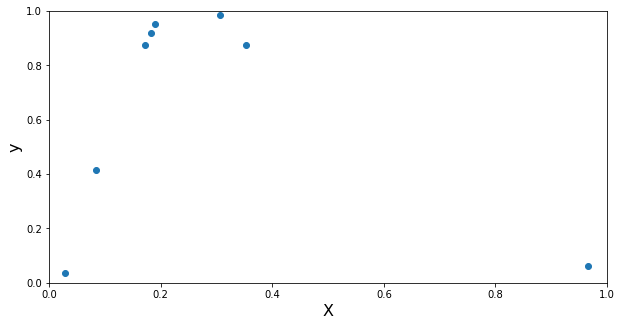

In [24]:
# plotting dataset
plt.figure(figsize=(10,5))
plt.scatter(X,y)
plt.xlabel('X',fontsize=16)
plt.ylabel('y',fontsize=16)
plt.xlim((0, 1))
plt.ylim((0, 1))
plt.show()

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
print(X_train)
print(X_train.shape)
print(y_train)
print(y_train.shape)

print(X_test)
print(X_test.shape)
print(y_test)
print(y_test.shape)

[0.55422759 0.60354842 0.17152166 0.68527698 0.51639863 0.27623883
 0.23235366 0.72899276 0.72154386 0.35213195]
(10,)
[-0.25834401 -0.51498238  0.8758932  -0.8125805  -0.02733646  1.01529055
  1.01578649 -0.85017621 -0.84802559  0.87318421]
(10,)
[0.89361308 0.02847423 0.57066759 0.78560176 0.30696622 0.83389686
 0.96548322 0.18993895 0.1818924  0.08356143]
(10,)
[-0.41353745  0.03497123 -0.34303077 -0.83006151  0.98588471 -0.67164194
  0.06256971  0.95136434  0.91780834  0.41602535]
(10,)


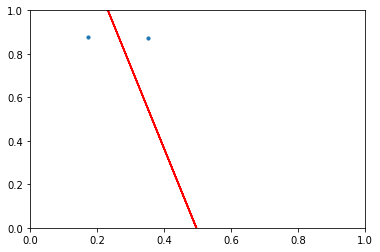

In [26]:
model = LinearRegression()
model.fit(X_train.reshape(-1, 1), y_train)
y_pred = model.predict(X_train.reshape(-1, 1))

plt.scatter(X_train, y_train, s=10)
plt.plot(X_train, y_pred, color='r')
plt.xlim((0, 1))
plt.ylim((0, 1))
plt.show()

In [27]:
degree = 0
pipeline = make_pipeline(PolynomialFeatures(degree),LinearRegression())
pipeline.fit(X_train[:, np.newaxis], y_train)

preds = pipeline.predict(X_test[:, np.newaxis])
preds.shape
# preds

(10,)

In [28]:
coefs = np.polyfit(X_train.flatten(), y_train.flatten(), degree)
coefs

array([0.04687093])

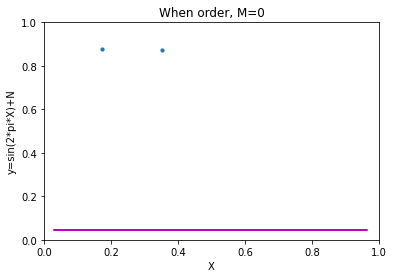

In [29]:
plt.scatter(X_train, y_train, s=10)
plt.plot(X_test, preds, color='m')
plt.title('When order, M=0')
plt.xlabel('X')
plt.ylabel('y=sin(2*pi*X)+N')
plt.xlim((0, 1))
plt.ylim((0, 1))
plt.show()

[-3.78522444  1.87976531]


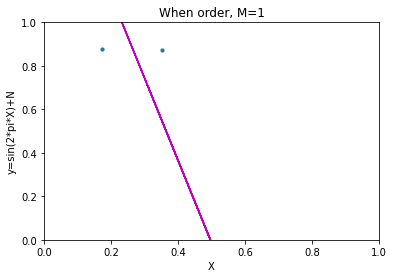

In [30]:
degree = 1
pipeline = make_pipeline(PolynomialFeatures(degree),LinearRegression())
pipeline.fit(X_train[:, np.newaxis], y_train)

preds = pipeline.predict(X_test[:, np.newaxis])

coefs = np.polyfit(X_train.flatten(), y_train.flatten(), degree)
print(coefs)

plt.scatter(X_train, y_train, s=10)
plt.plot(X_test, preds, color='m')
plt.title('When order, M=1')
plt.xlabel('X')
plt.ylabel('y=sin(2*pi*X)+N')
plt.xlim((0, 1))
plt.ylim((0, 1))
plt.show()


[ 34.36282015 -50.97314859  19.25487808  -1.1169383 ]


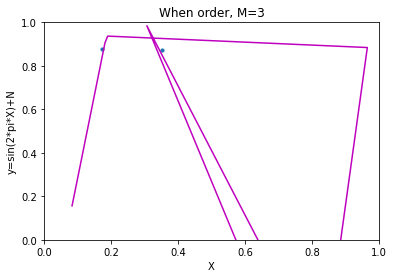

In [31]:
degree = 3
pipeline = make_pipeline(PolynomialFeatures(degree),LinearRegression())
pipeline.fit(X_train[:, np.newaxis], y_train)

preds = pipeline.predict(X_test[:, np.newaxis])

coefs = np.polyfit(X_train.flatten(), y_train.flatten(), degree)
print(coefs)

plt.scatter(X_train, y_train, s=10)
plt.plot(X_test, preds, color='m')
plt.title('When order, M=3')
plt.xlabel('X')
plt.ylabel('y=sin(2*pi*X)+N')
plt.xlim((0, 1))
plt.ylim((0, 1))
plt.show()

[-1.83975171e+05  7.64474210e+05 -1.37587594e+06  1.40436874e+06
 -8.93808438e+05  3.67074383e+05 -9.70989966e+04  1.59103742e+04
 -1.45932541e+03  5.77574529e+01]


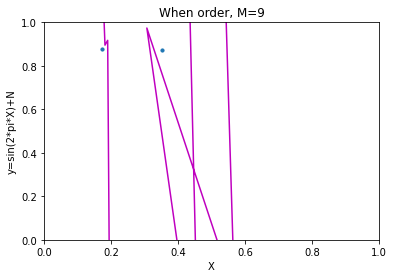

In [32]:
degree = 9
pipeline = make_pipeline(PolynomialFeatures(degree),LinearRegression())
pipeline.fit(X_train[:, np.newaxis], y_train)

preds = pipeline.predict(X_test[:, np.newaxis])

coefs = np.polyfit(X_train.flatten(), y_train.flatten(), degree)
print(coefs)

plt.scatter(X_train, y_train, s=10)
plt.plot(X_test, preds, color='m')
plt.title('When order, M=9')
plt.xlabel('X')
plt.ylabel('y=sin(2*pi*X)+N')
plt.xlim((0, 1))
plt.ylim((0, 1))
plt.show()

## Displaying weights in Table 

In [33]:
weights = []
M0 = [0,"","","","","","","","","" ]
M1 = [0,-0.39012766,"","","","","","","",""]
M3 = [0,-0.72768993,2.11420232,-1.986349090,"","","","","",""]
M9 =[0,-32.42123625,630.43839794,-4652.54557797, 16038.92928046, -26616.73893602,16020.44924781,9291.87084083,-16637.65286273,5956.51875661]

# weights = {'M=0': weights['M0'], 'M=1': weights['M1'], 'M=3': weights['M3'], 'M=9': weights['M9']}
weights = {'M = 0': M0, 'M = 1': M1, 'M = 3': M3, 'M = 9': M9}
indexes = ['w0', 'w1', 'w2', 'w3', 'w4', 'w5', 'w6', 'w7', 'w8', 'w9']
weights_df = pd.DataFrame(weights, index=indexes)
weights_df

,M = 0,M = 1,M = 3,M = 9
w0,0,0,0,0.000000
w1,,-0.390128,-0.72769,-32.421236
w2,,,2.1142,630.438398
w3,,,-1.98635,-4652.545578
w4,,,,16038.929280
w5,,,,-26616.738936
w6,,,,16020.449248
w7,,,,9291.870841
w8,,,,-16637.652863
w9,,,,5956.518757


## Train Error vs Test Error

In [34]:
# for m in range(0, 9):
  

### Now generate 100 more data and fit 9th order model and draw fit

### Now we will regularize using the sum of weights.

### Draw chart for lambda is 1, 1/10, 1/100, 1/1000, 1/10000, 1/100000 

### Now draw test  and train error according to lamda = 1, 1/10, 1/100, 1/1000, 1/10000, 1/100000 

### Best Model (According to test performance)

# References

https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html
